In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import houseprice_functions as hpf
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn import metrics
from sklearn import impute
from sklearn.preprocessing import power_transform
KNN = impute.KNNImputer
KNN = KNN()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
HousePrices = pd.read_csv('data/train.csv')
cleaned_hp_test = pd.read_csv('data/cleaned_houseprice_test.csv')
y = HousePrices[["Id",'SalePrice']]

x_y = cleaned_hp.merge(y,how = "inner",on = "Id")
y_train = np.log(x_y['SalePrice'])
X_train = x_y.drop(["Id"],axis = 1)

In [9]:
#outliers
train_outliers = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = 4,min_unique = 20, drop_zeros = True)
test_range = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = 4,min_unique = 20, drop_zeros = True,for_test = True)

# Outlier imputation

### RANDOM

###### Train

In [10]:
for col, idx in train_outliers.items():
    hpf.outlier_imputation(cleaned_hp, cleaned_hp,idx, col = col, method = "random", decimals = 2,drop_zeros = True)
    
y_train = np.log(x_y['SalePrice'])
X_train = x_y.drop(["Id"],axis = 1)

     Id  LotArea Before Imputation  LotArea After Imputation
0   249                     159000                     16158
1   313                     215245                     15256
2   335                     164660                      8816
3   384                      53107                     14054
4   451                      70761                     10552
5   457                      53227                      7200
6   706                     115149                      8935
7   769                      53504                     14154
8  1298                      63887                      8400
9  1396                      57200                      8000

     Id  TotalBsmtSF Before Imputation  TotalBsmtSF After Imputation
0   332                           3206                          1468
1   440                           3094                           847
2   496                           3200                          1278
3   523                           3138              

###### Test

In [11]:
for key,value in test_range.items():
    outliers = cleaned_hp_test.index[cleaned_hp_test.loc[:,key].apply(lambda x: (x < value[0]) or (x > value[1]))].to_list()
    if len(outliers) != 0:
        hpf.outlier_imputation(cleaned_hp, cleaned_hp_test,outliers, col = key, method = "random", decimals = 2,drop_zeros = True)

    Id  LotArea Before Imputation  LotArea After Imputation
0  790                      56600                      4274
1  803                      51974                      9120

     Id  TotalBsmtSF Before Imputation  TotalBsmtSF After Imputation
0    19                         2846.0                        1349.0
1  1089                         5095.0                        1138.0

     Id  GrLivArea Before Imputation  GrLivArea After Imputation
0   728                         3820                        1258
1  1089                         5095                         708
2  1362                         3672                        1518

    Id  GarageArea Before Imputation  GarageArea After Imputation
0  495                        1314.0                        680.0
1  611                        1488.0                        546.0
2  701                        1348.0                        644.0

     Id  EnclosedPorch Before Imputation  EnclosedPorch After Imputation
0  1043     

---

### KNeighbors

# KNN USING SKLEARN

In [12]:
KNN = impute.KNNImputer
KNN = KNN()

##### Train

In [13]:
#replaces outliers with NAN
for col, idx in train_outliers.items():
    cleaned_hp.loc[:,col].iloc[idx] = np.nan

columns_ = cleaned_hp.columns
cleaned_hp = KNN.fit_transform(cleaned_hp)
cleaned_hp = pd.DataFrame(cleaned_hp,columns = columns_)
cleaned_hp.head()

,Id,LotArea,Street,Alley,LotShape,LandSlope,YearRemodAdd,RoofMatl,MasVnrType,TotalBsmtSF,...,Zone_RH,Zone_RM,Found_BrkTil,Found_CBlock,Found_Slab,Found_Stone,Found_Wood,Contour_Bnk,Contour_HLS,Contour_Low
0,1.0,8450.0,1.0,0.0,0.0,0.0,2003.0,1.0,1.0,856.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,9600.0,1.0,0.0,0.0,0.0,1976.0,1.0,0.0,1262.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,11250.0,1.0,0.0,1.0,0.0,2002.0,1.0,1.0,920.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,9550.0,1.0,0.0,1.0,0.0,1970.0,1.0,0.0,756.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,14260.0,1.0,0.0,1.0,0.0,2000.0,1.0,1.0,1145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Test

In [14]:
#replaces outliers with NAN
for col,idx in test_range.items():
    outliers = cleaned_hp_test.index[cleaned_hp_test.loc[:,col].apply(lambda x: (x < idx[0]) or (x > idx[1]))].to_list()
    if len(outliers) != 0:
        cleaned_hp_test.loc[:,col].iloc[outliers] = np.nan

columns_ = cleaned_hp_test.columns
cleaned_hp_test = KNN.fit_transform(cleaned_hp_test)
cleaned_hp_test = pd.DataFrame(cleaned_hp_test,columns = columns_)
cleaned_hp_test.head()

,Id,LotArea,Street,Alley,LotShape,LandSlope,YearRemodAdd,RoofMatl,MasVnrType,TotalBsmtSF,...,Zone_RH,Zone_RM,Found_BrkTil,Found_CBlock,Found_Slab,Found_Stone,Found_Wood,Contour_Bnk,Contour_HLS,Contour_Low
0,1461.0,11622.0,1.0,0.0,0.0,0.0,1961.0,1.0,0.0,882.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462.0,14267.0,1.0,0.0,1.0,0.0,1958.0,1.0,1.0,1329.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463.0,13830.0,1.0,0.0,1.0,0.0,1998.0,1.0,0.0,928.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464.0,9978.0,1.0,0.0,1.0,0.0,1998.0,1.0,1.0,926.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465.0,5005.0,1.0,0.0,1.0,0.0,1992.0,1.0,0.0,1280.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
#TRAIN X y
y_train = np.log(x_y['SalePrice'])
X_train = cleaned_hp.drop(["Id"],axis = 1)

---

## KNN using most similar home 

In [16]:
impute_dict = {
    'GarageArea':'LotArea',
    'TotalBsmtSF': 'GrLivArea',
    'GrLivArea':'TotalBsmtSF',
    'EnclosedPorch':'Total_PorchDeckSF',
    'Total_PorchDeckSF':'EnclosedPorch'
}

###### Train

In [17]:
for col, idx in train_outliers.items():
    for col_impute, col_neighbor in impute_dict.items():
        if col == col_impute:
            hpf.k_neighbors(cleaned_hp,cleaned_hp,col,idx,col_neighbor,k = 5)    

#TRAIN X y
y_train = np.log(x_y['SalePrice'])
X_train = cleaned_hp.drop(["Id"],axis = 1)

-------------------- 
imputed on: TotalBsmtSF 
Neighbor calculation: GrLivArea 
ID: 332 
Before: 1325.2 
After: 1286.4 
 --------------------
-------------------- 
imputed on: TotalBsmtSF 
Neighbor calculation: GrLivArea 
ID: 440 
Before: 1508.6 
After: 1430.6 
 --------------------
-------------------- 
imputed on: TotalBsmtSF 
Neighbor calculation: GrLivArea 
ID: 496 
Before: 1370.4 
After: 1649.4 
 --------------------
-------------------- 
imputed on: TotalBsmtSF 
Neighbor calculation: GrLivArea 
ID: 523 
Before: 1547.2 
After: 1241.4 
 --------------------
-------------------- 
imputed on: TotalBsmtSF 
Neighbor calculation: GrLivArea 
ID: 1298 
Before: 1455.2 
After: 1264.8 
 --------------------
-------------------- 
imputed on: GrLivArea 
Neighbor calculation: TotalBsmtSF 
ID: 523 
Before: 2101.0 
After: 1599.0 
 --------------------
-------------------- 
imputed on: GrLivArea 
Neighbor calculation: TotalBsmtSF 
ID: 691 
Before: 2237.8 
After: 2469.04 
 --------------------
----

###### Test

In [18]:
for col,idx in test_range.items():
    outliers = cleaned_hp_test.index[cleaned_hp_test.loc[:,key].apply(lambda x: (x < value[0]) or (x > value[1]))].to_list()
    if len(outliers) != 0:
        for col_impute, col_neighbor in impute_dict.items():
            if col == col_impute:
                hpf.k_neighbors(cleaned_hp,cleaned_hp_test,col,outliers,col_neighbor,k = 5)

# Elastic Net

### standardization 

##### Train

In [19]:
en_model = ElasticNetCV(l1_ratio=[0.7], eps=1e-3, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)

for col in X_train.columns:
    if (X_train[col].nunique() != 2) and (X_train[col].skew() > 0.75):
        print(col)
        print(X_train[col].skew())
        X_train[col] = np.log1p(X_train[col])
        print(X_train[col].skew())
        print('-'*50)

full_model = en_model.fit(X_train, y_train)
y_pred = full_model.predict(X_train)
print("Full Model RMSE:",np.sqrt(metrics.mean_squared_error(y_pred, y_train)))
print("Full model R2:",en_model.score(X_train,y_train))

LotArea
2.5023009425758294
-0.9136315930988614
--------------------------------------------------
LotShape
1.309985656555955
0.7831035648282987
--------------------------------------------------
LandSlope
4.813682424489448
4.297167061742489
--------------------------------------------------
GrLivArea
0.7978633931502404
-0.12779382072366047
--------------------------------------------------
EnclosedPorch
2.8793402413491145
2.118754318995043
--------------------------------------------------
Total_PorchDeckSF
1.0223510811021597
-0.9075246202656158
--------------------------------------------------
Full Model RMSE: 0.11345209580215457
Full model R2: 0.9192776686165139


##### Test

In [20]:
X_test = cleaned_hp_test.drop(["Id",'0'],axis = 1)
for col in X_test.columns:
    if (X_test[col].nunique() != 2) and (X_test[col].skew() > 0.75):
        print(col)
        print(X_test[col].skew())
        X_test[col] = np.log1p(X_test[col])
        print(X_test[col].skew())
        print('-'*50)

LotArea
2.5595652494981245
-0.990747751372395
--------------------------------------------------
LotShape
1.2042262704496145
0.7679560899873284
--------------------------------------------------
LandSlope
4.968389880056036
4.64800252535215
--------------------------------------------------
GrLivArea
0.8225763707672019
-0.040982180569069535
--------------------------------------------------
Fireplaces
0.8198582704555165
0.29412900401924885
--------------------------------------------------
EnclosedPorch
2.941709518268587
1.8215623593065573
--------------------------------------------------
Total_PorchDeckSF
1.010336752218337
-0.944604173576422
--------------------------------------------------


In [21]:
y_log_values = full_model.predict(X_test)
y_test = np.exp(y_log_values)
results = pd.DataFrame(zip(cleaned_hp_test.Id.astype(int),y_test),columns = ["Id","SalePrice"])
results.head(10)

,Id,SalePrice
0,1461,124570.917727
1,1462,156702.648124
2,1463,176995.465863
3,1464,195271.307025
4,1465,203262.625074
5,1466,166419.211843
6,1467,174627.879620
7,1468,159750.783209
8,1469,190590.176634
9,1470,116880.631767


In [22]:
test_submission = results.to_csv('data/submission.csv',index = False)

# BEST MODEL CALCULATION

In [23]:
%%time
score_mean = []
#MODEL
en_model = ElasticNetCV(l1_ratio=[0.5,0.6,0.65,0.7,0.75],n_alphas = 720, eps=1e-4, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=1)

c = 0
iters = np.arange(3.7,5.3,0.2)
for i in iters:
    # READ IN
    cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
    HousePrices = pd.read_csv('data/train.csv')
    cleaned_hp_test = pd.read_csv('data/cleaned_houseprice_test.csv')
    y = HousePrices[["Id",'SalePrice']]
    x_y = cleaned_hp.merge(y,how = "inner",on = "Id")
    
    #outlier
    train_outliers = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = i,min_unique = 20, drop_zeros = True)
    
    for col, idx in train_outliers.items():
        hpf.outlier_imputation(cleaned_hp, cleaned_hp,idx, col = col, method = "mean", decimals = 2,drop_zeros = True,sup_output = True)
        
    #TRAIN X y
    y_train = np.log(x_y['SalePrice'])
    X_train = cleaned_hp.drop(["Id"],axis = 1)
    
    for col in X_train.columns:
        if (X_train[col].nunique() != 2) and (X_train[col].skew() > 0.75):
            X_train[col] = np.log1p(X_train[col])          
            
    full_model = en_model.fit(X_train, y_train)
    y_pred = full_model.predict(X_train)
    score_mean.append(np.sqrt(metrics.mean_squared_error(y_pred, y_train)))
    c+=1
    total = len(iters)
    print(f'{c} of {total}')  

1 of 8
2 of 8
3 of 8
4 of 8
5 of 8
6 of 8
7 of 8
8 of 8
Wall time: 1min 15s


In [24]:
%%time
scores = []
#MODEL
en_model = ElasticNetCV(l1_ratio=[0.5,0.6,0.65,0.7,0.75],n_alphas = 720, eps=1e-4, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=1)

c = 0
iters = np.arange(3.7,5.3,0.2)
for i in iters:
    
    # READ IN
    cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
    HousePrices = pd.read_csv('data/train.csv')
    cleaned_hp_test = pd.read_csv('data/cleaned_houseprice_test.csv')
    y = HousePrices[["Id",'SalePrice']]
    x_y = cleaned_hp.merge(y,how = "inner",on = "Id")
    
    #outlier
    train_outliers = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = i,min_unique = 20, drop_zeros = True)
    
    #replaces outliers with NAN
    for col, idx in train_outliers.items():
        cleaned_hp.loc[:,col].iloc[idx] = np.nan

    columns_ = cleaned_hp.columns
    cleaned_hp = KNN.fit_transform(cleaned_hp)
    cleaned_hp = pd.DataFrame(cleaned_hp,columns = columns_) 
        
        
        
    #TRAIN X y
    y_train = np.log(x_y['SalePrice'])
    X_train = cleaned_hp.drop(["Id"],axis = 1)
    
    
    for col in X_train.columns:
        if (X_train[col].nunique() != 2) and (X_train[col].skew() > 0.75):
            X_train[col] = np.log1p(X_train[col])          
            
    full_model = en_model.fit(X_train, y_train)
    y_pred = full_model.predict(X_train)
    scores.append(np.sqrt(metrics.mean_squared_error(y_pred, y_train)))
    c+=1
    total = len(iters)
    print(f'{c} of {total}')   

1 of 8
2 of 8
3 of 8
4 of 8
5 of 8
6 of 8
7 of 8
8 of 8
Wall time: 1min 18s


In [25]:
%%time
score_R = []
#MODEL
en_model = ElasticNetCV(l1_ratio=[0.5,0.6,0.65,0.7,0.75],n_alphas = 720, eps=1e-4, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=1)

c = 0
iters = np.arange(3.7,5.3,0.2)
for i in iters:
    avg = []
    iter_avg = 10
    count = 0
    for j in range(iter_avg):
        # READ IN
        cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
        HousePrices = pd.read_csv('data/train.csv')
        cleaned_hp_test = pd.read_csv('data/cleaned_houseprice_test.csv')
        y = HousePrices[["Id",'SalePrice']]
        x_y = cleaned_hp.merge(y,how = "inner",on = "Id")

        #outlier
        train_outliers = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = i,min_unique = 20, drop_zeros = True)

        #replaces outliers with NAN
        for col, idx in train_outliers.items():
            hpf.outlier_imputation(cleaned_hp, cleaned_hp,idx, col = col, method = "random", decimals = 2,drop_zeros = True,sup_output = True)



        #TRAIN X y
        y_train = np.log(x_y['SalePrice'])
        X_train = cleaned_hp.drop(["Id"],axis = 1)


        for col in X_train.columns:
            if (X_train[col].nunique() != 2) and (X_train[col].skew() > 0.75):
                X_train[col] = np.log1p(X_train[col])          

        full_model = en_model.fit(X_train, y_train)
        y_pred = full_model.predict(X_train)
        avg.append(np.sqrt(metrics.mean_squared_error(y_pred, y_train)))
        count +=1
        print(f'\t{count} of {iter_avg} averages')
    score_R.append(np.mean(avg))
    c+=1
    total = len(iters)
    print(f'{c} of {total}')   

	1 of 10 averages
	2 of 10 averages
	3 of 10 averages
	4 of 10 averages
	5 of 10 averages
	6 of 10 averages
	7 of 10 averages
	8 of 10 averages
	9 of 10 averages
	10 of 10 averages
1 of 8
	1 of 10 averages
	2 of 10 averages
	3 of 10 averages
	4 of 10 averages
	5 of 10 averages
	6 of 10 averages
	7 of 10 averages
	8 of 10 averages
	9 of 10 averages
	10 of 10 averages
2 of 8
	1 of 10 averages
	2 of 10 averages
	3 of 10 averages
	4 of 10 averages
	5 of 10 averages
	6 of 10 averages
	7 of 10 averages
	8 of 10 averages
	9 of 10 averages
	10 of 10 averages
3 of 8
	1 of 10 averages
	2 of 10 averages
	3 of 10 averages
	4 of 10 averages
	5 of 10 averages
	6 of 10 averages
	7 of 10 averages
	8 of 10 averages
	9 of 10 averages
	10 of 10 averages
4 of 8
	1 of 10 averages
	2 of 10 averages
	3 of 10 averages
	4 of 10 averages
	5 of 10 averages
	6 of 10 averages
	7 of 10 averages
	8 of 10 averages
	9 of 10 averages
	10 of 10 averages
5 of 8
	1 of 10 averages
	2 of 10 averages
	3 of 10 averages
	4 of 

In [26]:
%%time
score_K = []

impute_dict = {
    'GarageArea':'LotArea',
    'TotalBsmtSF': 'GrLivArea',
    'GrLivArea':'TotalBsmtSF',
    'EnclosedPorch':'Total_PorchDeckSF',
    'Total_PorchDeckSF':'EnclosedPorch'
}

#MODEL
en_model = ElasticNetCV(l1_ratio=[0.5,0.6,0.65,0.7,0.75],n_alphas = 720, eps=1e-4, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=1)

c = 0
iters = np.arange(3.7,5.3,0.2)
for i in iters:
    
    # READ IN
    cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
    HousePrices = pd.read_csv('data/train.csv')
    cleaned_hp_test = pd.read_csv('data/cleaned_houseprice_test.csv')
    y = HousePrices[["Id",'SalePrice']]
    x_y = cleaned_hp.merge(y,how = "inner",on = "Id")
    
    #outlier
    train_outliers = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = i,min_unique = 20, drop_zeros = True)
    
    for col, idx in train_outliers.items():
        for col_impute, col_neighbor in impute_dict.items():
            if col == col_impute:
                hpf.k_neighbors(cleaned_hp,cleaned_hp,col,idx,col_neighbor,k = 5, sup_output = True)   
        
    #TRAIN X y
    y_train = np.log(x_y['SalePrice'])
    X_train = cleaned_hp.drop(["Id"],axis = 1)
    
    
    for col in X_train.columns:
        if (X_train[col].nunique() != 2) and (X_train[col].skew() > 0.75):
            X_train[col] = np.log1p(X_train[col])          
            
    full_model = en_model.fit(X_train, y_train)
    y_pred = full_model.predict(X_train)
    score_K.append(np.sqrt(metrics.mean_squared_error(y_pred, y_train)))
    c+=1
    total = len(iters)
    print(f'{c} of {total}')   

1 of 8
2 of 8
3 of 8
4 of 8
5 of 8
6 of 8
7 of 8
8 of 8
Wall time: 1min 30s


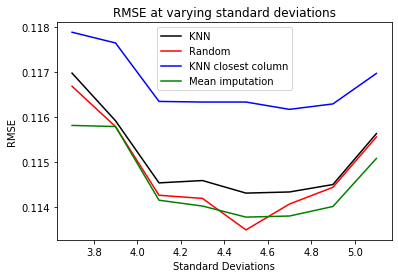

In [27]:
plt.plot(iters,scores,c = 'k',label = "KNN")
plt.plot(iters,score_R,c = 'r',label = "Random")
plt.plot(iters,score_K,c = 'b', label = "KNN closest column")
plt.plot(iters,score_mean,c = 'g', label = "Mean imputation")
plt.legend()
plt.xlabel('Standard Deviations')
plt.ylabel('RMSE')
plt.title('RMSE at varying standard deviations')
plt.show()

## Multiple Random imputation

- Randomly imputes the outlier values
- average for multiple runs

In [43]:
%%time
#MODEL
en_model = ElasticNetCV(l1_ratio=[0.5,0.6,0.65,0.7,0.75],n_alphas = 720, eps=1e-4, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=1)

all_outs = []
count = 0
num_ints = 100
for j in range(num_ints):
    # READ IN
    cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
    HousePrices = pd.read_csv('data/train.csv')
    cleaned_hp_test = pd.read_csv('data/cleaned_houseprice_test.csv')
    y = HousePrices[["Id",'SalePrice']]
    x_y = cleaned_hp.merge(y,how = "inner",on = "Id")

    #outlier
    train_outliers = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = 4.5,min_unique = 20, drop_zeros = True)
    test_range = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = 4.5,min_unique = 20, drop_zeros = True,for_test = True)

    #replaces outliers with NAN
    for col, idx in train_outliers.items():
        hpf.outlier_imputation(cleaned_hp, cleaned_hp,idx, col = col, method = "random", decimals = 2,drop_zeros = True, sup_output = True)

    for key,value in test_range.items():
        outliers = cleaned_hp_test.index[cleaned_hp_test.loc[:,key].apply(lambda x: (x < value[0]) or (x > value[1]))].to_list()
        if len(outliers) != 0:
            hpf.outlier_imputation(cleaned_hp, cleaned_hp_test,outliers, col = key, method = "random", decimals = 2,drop_zeros = True,sup_output = True)
        
    #TRAIN X y
    y_train = np.log(x_y['SalePrice'])
    X_train = cleaned_hp.drop(["Id"],axis = 1)
    X_test = cleaned_hp_test.drop(["Id",'0'],axis = 1)


    for col in X_train.columns:
        if (X_train[col].nunique() != 2) and (X_train[col].skew() > 0.75):
            X_train[col] = np.log1p(X_train[col])
    for col in X_test.columns:
        if (X_test[col].nunique() != 2) and (X_test[col].skew() > 0.75):
            X_test[col] = np.log1p(X_test[col])

    full_model = en_model.fit(X_train, y_train)
    ###############
    y_log_values = full_model.predict(X_test)
    y_test = np.exp(y_log_values)
    all_outs.append(y_test)
    ###############
    count += 1
    print(f'{count} of {num_ints}')


1 of 100
2 of 100
3 of 100
4 of 100
5 of 100
6 of 100
7 of 100
8 of 100
9 of 100
10 of 100
11 of 100
12 of 100
13 of 100
14 of 100
15 of 100
16 of 100
17 of 100
18 of 100
19 of 100
20 of 100
21 of 100
22 of 100
23 of 100
24 of 100
25 of 100
26 of 100
27 of 100
28 of 100
29 of 100
30 of 100
31 of 100
32 of 100
33 of 100
34 of 100
35 of 100
36 of 100
37 of 100
38 of 100
39 of 100
40 of 100
41 of 100
42 of 100
43 of 100
44 of 100
45 of 100
46 of 100
47 of 100
48 of 100
49 of 100
50 of 100
51 of 100
52 of 100
53 of 100
54 of 100
55 of 100
56 of 100
57 of 100
58 of 100
59 of 100
60 of 100
61 of 100
62 of 100
63 of 100
64 of 100
65 of 100
66 of 100
67 of 100
68 of 100
69 of 100
70 of 100
71 of 100
72 of 100
73 of 100
74 of 100
75 of 100
76 of 100
77 of 100
78 of 100
79 of 100
80 of 100
81 of 100
82 of 100
83 of 100
84 of 100
85 of 100
86 of 100
87 of 100
88 of 100
89 of 100
90 of 100
91 of 100
92 of 100
93 of 100
94 of 100
95 of 100
96 of 100
97 of 100
98 of 100
99 of 100
100 of 100
Wall tim

In [44]:
results = pd.DataFrame(zip(cleaned_hp_test.Id.astype(int),np.sum(all_outs,axis = 0)/len(all_outs)),columns = ["Id","SalePrice"])
results.head()

,Id,SalePrice
0,1461,124495.107980
1,1462,159324.313127
2,1463,177771.207402
3,1464,196792.277702
4,1465,202256.438715


In [45]:
xgb = pd.read_csv('data/submission_xgb_base_drop.csv')

In [46]:
results.SalePrice = (xgb.SalePrice + results.SalePrice)/2

In [47]:
test_submission = results.to_csv('data/submission.csv',index = False)